In [1]:
import pandas
import matplotlib.pyplot

pandas.plotting.register_matplotlib_converters()

In [2]:
bikesharing_daily = pandas.read_csv("bike_sharing_daily.csv")
bikesharing_daily

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,02-01-2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,03-01-2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,04-01-2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,05-01-2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,27-12-2012,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,28-12-2012,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,29-12-2012,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,30-12-2012,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [3]:
bikesharing_daily['dteday'] = pandas.DatetimeIndex(bikesharing_daily['dteday'])

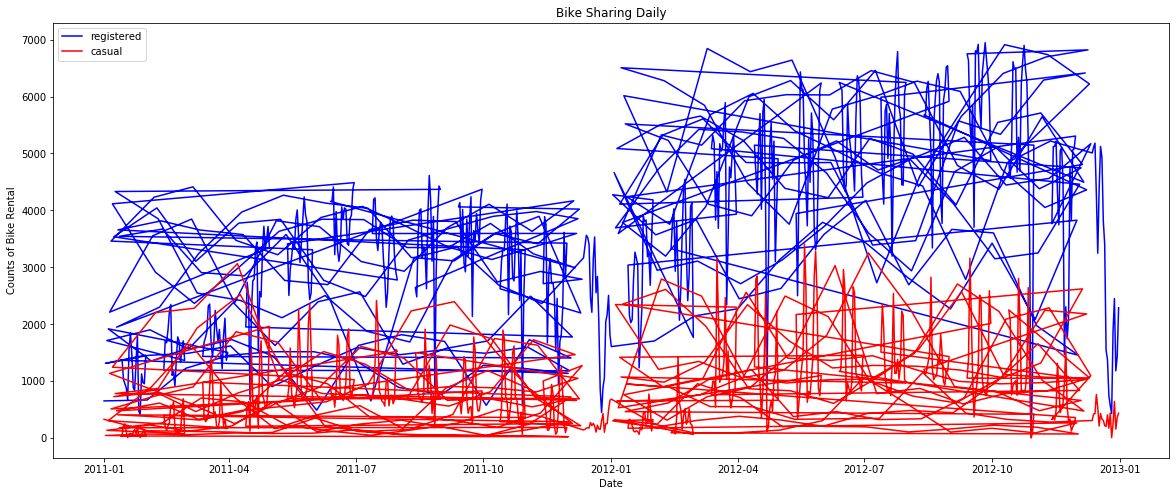

In [4]:
matplotlib.pyplot.figure(figsize = (20, 8))

matplotlib.pyplot.plot(bikesharing_daily['dteday'],
                      bikesharing_daily['registered'],
                      color = 'b',
                      label = 'registered')
matplotlib.pyplot.plot(bikesharing_daily['dteday'],
                      bikesharing_daily['casual'],
                      color = 'r',
                      label = 'casual')
matplotlib.pyplot.legend(loc = 'upper left')

matplotlib.pyplot.title('Bike Sharing Daily')
matplotlib.pyplot.xlabel('Date')
matplotlib.pyplot.ylabel('Counts of Bike Rental')

matplotlib.pyplot.show()

In [5]:
year_df = bikesharing_daily.groupby('yr', as_index = False).mean()
year_df[['yr', 'cnt']]

,yr,cnt
0,0,3405.761644
1,1,5599.934426


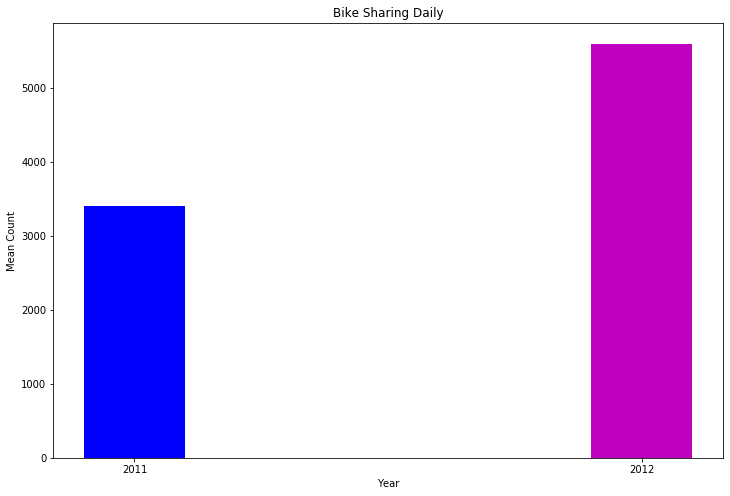

In [6]:
matplotlib.pyplot.figure(figsize = (12, 8))

colors = ['b', 'm']

matplotlib.pyplot.bar(year_df['yr'], year_df['cnt'], width = 0.2,
                      color = colors)
matplotlib.pyplot.xticks([0, 1], ['2011', '2012'])

matplotlib.pyplot.title('Bike Sharing Daily')
matplotlib.pyplot.xlabel('Year')
matplotlib.pyplot.ylabel('Mean Count')

matplotlib.pyplot.show()

In [7]:
days_rent = bikesharing_daily.groupby('workingday', as_index = False).mean()
days_rent[['cnt']]

,cnt
0,4330.168831
1,4584.820000


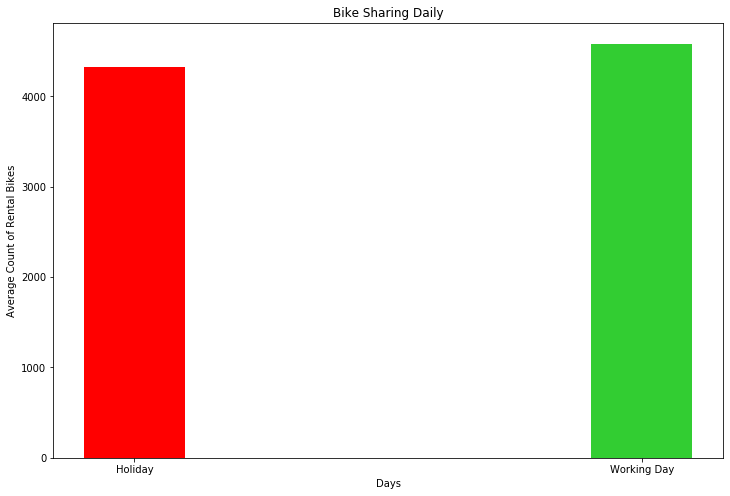

In [8]:
matplotlib.pyplot.figure(figsize = (12, 8))

matplotlib.pyplot.bar(days_rent['workingday'], days_rent['cnt'],
                     width = 0.2, color = ['red', 'limegreen'])
matplotlib.pyplot.xticks([0, 1], ['Holiday', 'Working Day'])

matplotlib.pyplot.title('Bike Sharing Daily')
matplotlib.pyplot.xlabel('Days')
matplotlib.pyplot.ylabel('Average Count of Rental Bikes')

matplotlib.pyplot.show()

In [9]:
year_data = bikesharing_daily.loc[bikesharing_daily['yr'] == 1]
year_data

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
365,2012-01-01,1,1,1,0,0,0,1,0.370000,0.375621,0.692500,0.192167,686,1608,2294
366,2012-02-01,1,1,1,1,1,0,1,0.273043,0.252304,0.381304,0.329665,244,1707,1951
367,2012-03-01,1,1,1,0,2,1,1,0.150000,0.126275,0.441250,0.365671,89,2147,2236
368,2012-04-01,1,1,1,0,3,1,2,0.107500,0.119337,0.414583,0.184700,95,2273,2368
369,2012-05-01,1,1,1,0,4,1,1,0.265833,0.278412,0.524167,0.129987,140,3132,3272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [10]:
month_df = year_data[['mnth', 'cnt']].groupby('mnth', as_index = False).mean()
month_df

,mnth,cnt
0,1,3120.774194
1,2,3556.448276
2,3,5318.548387
3,4,5807.466667
4,5,6318.225806
5,6,6761.000000
6,7,6567.967742
7,8,6919.451613
8,9,7285.766667
9,10,6414.225806


In [11]:
month_df['mnth'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                        ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
                        'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                        inplace = True)
month_df

,mnth,cnt
0,Jan,3120.774194
1,Feb,3556.448276
2,Mar,5318.548387
3,Apr,5807.466667
4,May,6318.225806
5,Jun,6761.000000
6,Jul,6567.967742
7,Aug,6919.451613
8,Sep,7285.766667
9,Oct,6414.225806


Text(0, 0.5, 'Average Counts of Bike Rental')

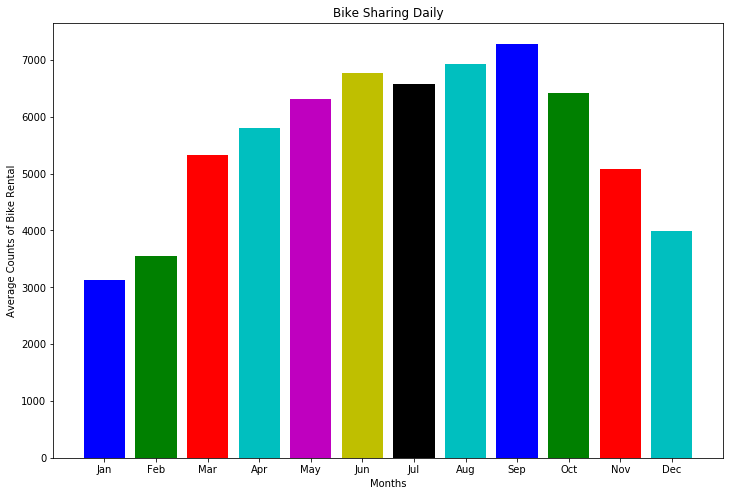

In [12]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'c']

matplotlib.pyplot.figure(figsize = (12, 8))
matplotlib.pyplot.bar(month_df['mnth'], month_df['cnt'], color = colors)

matplotlib.pyplot.title('Bike Sharing Daily')
matplotlib.pyplot.xlabel('Months')
matplotlib.pyplot.ylabel('Average Counts of Bike Rental')

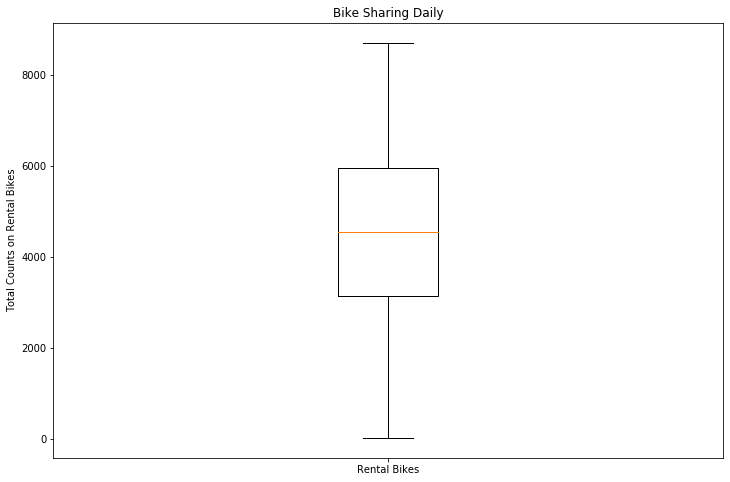

In [13]:
matplotlib.pyplot.figure(figsize = (12, 8))
matplotlib.pyplot.boxplot(bikesharing_daily['cnt'])

matplotlib.pyplot.xticks([1], ['Rental Bikes'])
matplotlib.pyplot.title('Bike Sharing Daily')
matplotlib.pyplot.ylabel('Total Counts on Rental Bikes')

matplotlib.pyplot.show()

In [14]:
selected_bikes = bikesharing_daily[['casual', 'registered']]
selected_bikes

,casual,registered
0,331,654
1,131,670
2,120,1229
3,108,1454
4,82,1518
...,...,...
726,247,1867
727,644,2451
728,159,1182
729,364,1432


In [15]:
columns = selected_bikes.columns
columns

Index(['casual', 'registered'], dtype='object')

In [16]:
bike_data_array = selected_bikes.values
bike_data_array

array([[ 331,  654],
       [ 131,  670],
       [ 120, 1229],
       ...,
       [ 159, 1182],
       [ 364, 1432],
       [ 439, 2290]], dtype=int64)

In [17]:
colors = ['r', 'g']

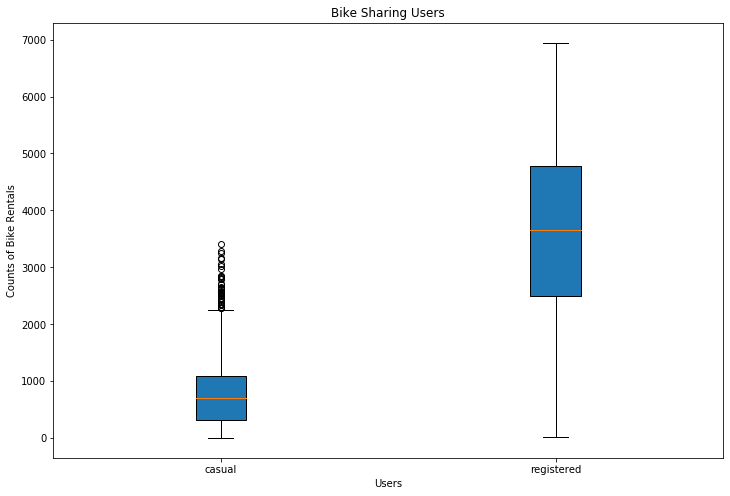

In [18]:
matplotlib.pyplot.figure(figsize = (12, 8))
matplotlib.pyplot.boxplot(bike_data_array, patch_artist = True,
                         labels = columns)
matplotlib.pyplot.title('Bike Sharing Users')
matplotlib.pyplot.xlabel('Users')
matplotlib.pyplot.ylabel('Counts of Bike Rentals')
matplotlib.pyplot.show()

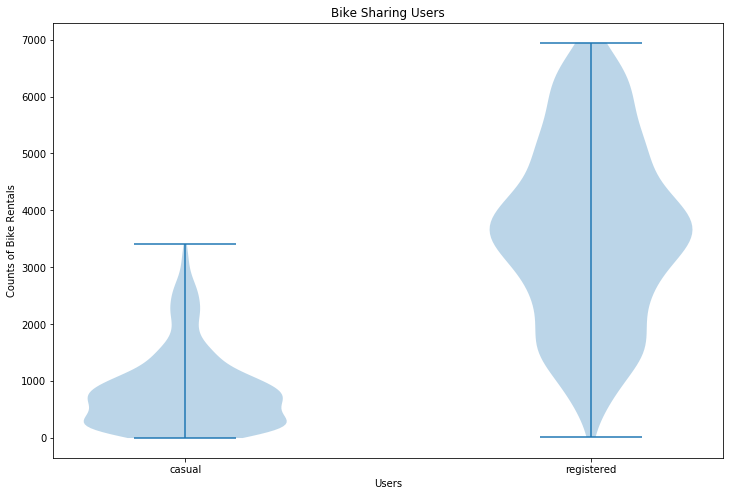

In [19]:
matplotlib.pyplot.figure(figsize = (12, 8))
matplotlib.pyplot.violinplot(bike_data_array)
matplotlib.pyplot.xticks([1, 2], columns)
matplotlib.pyplot.title('Bike Sharing Users')
matplotlib.pyplot.xlabel('Users')
matplotlib.pyplot.ylabel('Counts of Bike Rentals')
matplotlib.pyplot.show()

In [20]:
season_data = bikesharing_daily[['season', 'cnt']]
season_data

,season,cnt
0,1,985
1,1,801
2,1,1349
3,1,1562
4,1,1600
...,...,...
726,1,2114
727,1,3095
728,1,1341
729,1,1796


In [21]:
grouped_data = season_data.groupby('season', as_index = False).sum()
grouped_data

,season,cnt
0,1,471348
1,2,918589
2,3,1061129
3,4,841613


In [22]:
grouped_data['season'].replace([1, 2, 3, 4],
                              ['spring', 'summer', 'fall', 'winter'],
                              inplace = True)
grouped_data

,season,cnt
0,spring,471348
1,summer,918589
2,fall,1061129
3,winter,841613


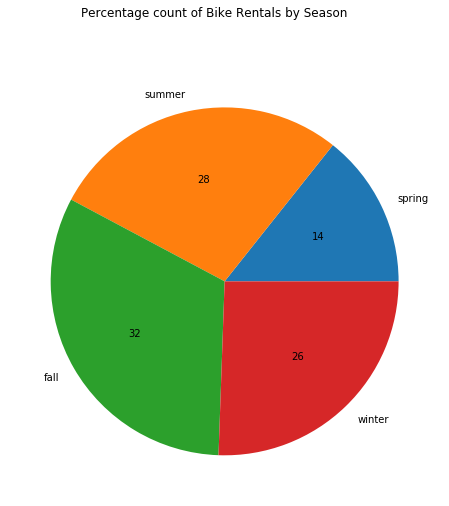

In [23]:
matplotlib.pyplot.figure(figsize = (12, 8))
matplotlib.pyplot.pie(grouped_data['cnt'],
                     labels = grouped_data['season'],
                     autopct = '%.lf')
matplotlib.pyplot.suptitle('Percentage count of Bike Rentals by Season')
matplotlib.pyplot.show()

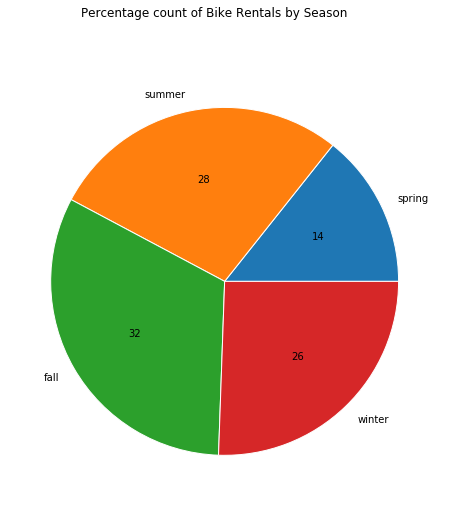

In [24]:
matplotlib.pyplot.figure(figsize = (12, 8))
matplotlib.pyplot.pie(grouped_data['cnt'],
                     labels = grouped_data['season'],
                     autopct = '%.lf',
                     wedgeprops = {'linewidth':1,
                                  'edgecolor':"white"})
matplotlib.pyplot.suptitle('Percentage count of Bike Rentals by Season')
matplotlib.pyplot.show()

In [25]:
explode_max = (0, 0, 0.2, 0)
explode_min = (0.2, 0, 0, 0)

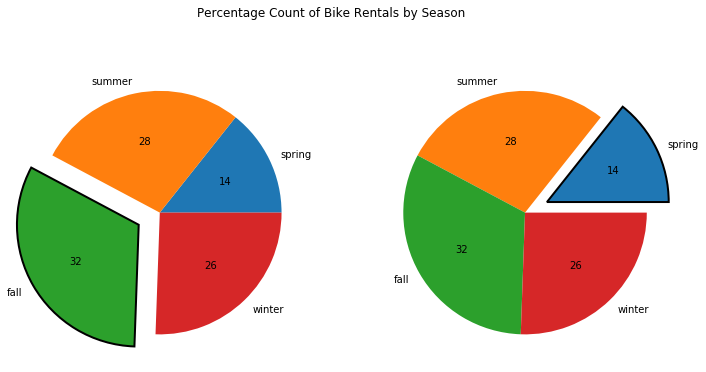

In [26]:
fig, (ax1, ax2) = matplotlib.pyplot.subplots(1, 2, figsize = (12, 6))
wedges, texts, autotexts = ax1.pie(grouped_data['cnt'],
                                  labels = grouped_data['season'],
                                  autopct = '%.lf',
                                  explode = explode_max)
wedges[2].set(edgecolor = 'k', linewidth = 2)

wedges, texts, autotexts = ax2.pie(grouped_data['cnt'],
                                  labels = grouped_data['season'],
                                  autopct = '%.lf',
                                  explode = explode_min)
wedges[0].set(edgecolor = 'k', linewidth = 2)
matplotlib.pyplot.suptitle('Percentage Count of Bike Rentals by Season')
matplotlib.pyplot.show()